In [69]:
! pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Read historical Data

In [70]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

stock_apple = yf.download('AAPL', start='2018-01-01', end='2021-12-01')
stock_amazon = yf.download('AMZN', start='2018-01-01', end='2021-12-01')
stock_microsoft = yf.download('MSFT', start='2018-01-01', end='2021-12-01')
stock_google = yf.download('GOOG', start='2018-01-01', end='2021-12-01')
# stock_tesla = yf.download('TSLA', start='2018-01-01', end='2021-12-01')
stock_apple.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.950493,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.943356,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.133537,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.601860,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.447350,82271200


In [71]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Price movement

In [72]:
stock_apple_new = stock_apple
stock_microsoft_new = stock_microsoft
stock_amazon_new = stock_amazon
stock_google_new = stock_google

In [73]:
# change between t and t+1 days
stock_apple_new["prevClose"] = stock_apple_new.Close.shift(1)
stock_apple_new['change'] = 100*(stock_apple_new['Close']-stock_apple_new['prevClose'])/stock_apple_new['prevClose']
stock_apple_new['movement'] = np.where( 100*(stock_apple_new['Close']-stock_apple_new['prevClose'])/stock_apple_new['prevClose'] >0, 1,-1)

stock_microsoft_new["prevClose"] = stock_microsoft_new.Close.shift(1)
stock_microsoft_new['change'] = 100*(stock_microsoft_new['Close']-stock_microsoft_new['prevClose'])/stock_microsoft_new['prevClose']
stock_microsoft_new['movement'] = np.where( 100*(stock_microsoft_new['Close']-stock_microsoft_new['prevClose'])/stock_microsoft_new['prevClose'] >0, 1,-1)

stock_amazon_new["prevClose"] = stock_amazon_new.Close.shift(1)
stock_amazon_new['change'] = 100*(stock_amazon_new['Close']-stock_amazon_new['prevClose'])/stock_amazon_new['prevClose']
stock_amazon_new['movement'] = np.where( 100*(stock_amazon_new['Close']-stock_amazon_new['prevClose'])/stock_amazon_new['prevClose'] >0, 1,-1)

stock_google_new["prevClose"] = stock_google_new.Close.shift(1)
stock_google_new['change'] = 100*(stock_google_new['Close']-stock_google_new['prevClose'])/stock_google_new['prevClose']
stock_google_new['movement'] = np.where( 100*(stock_google_new['Close']-stock_google_new['prevClose'])/stock_google_new['prevClose'] >0, 1,-1)


In [74]:
stock_apple_new = stock_apple_new.dropna()

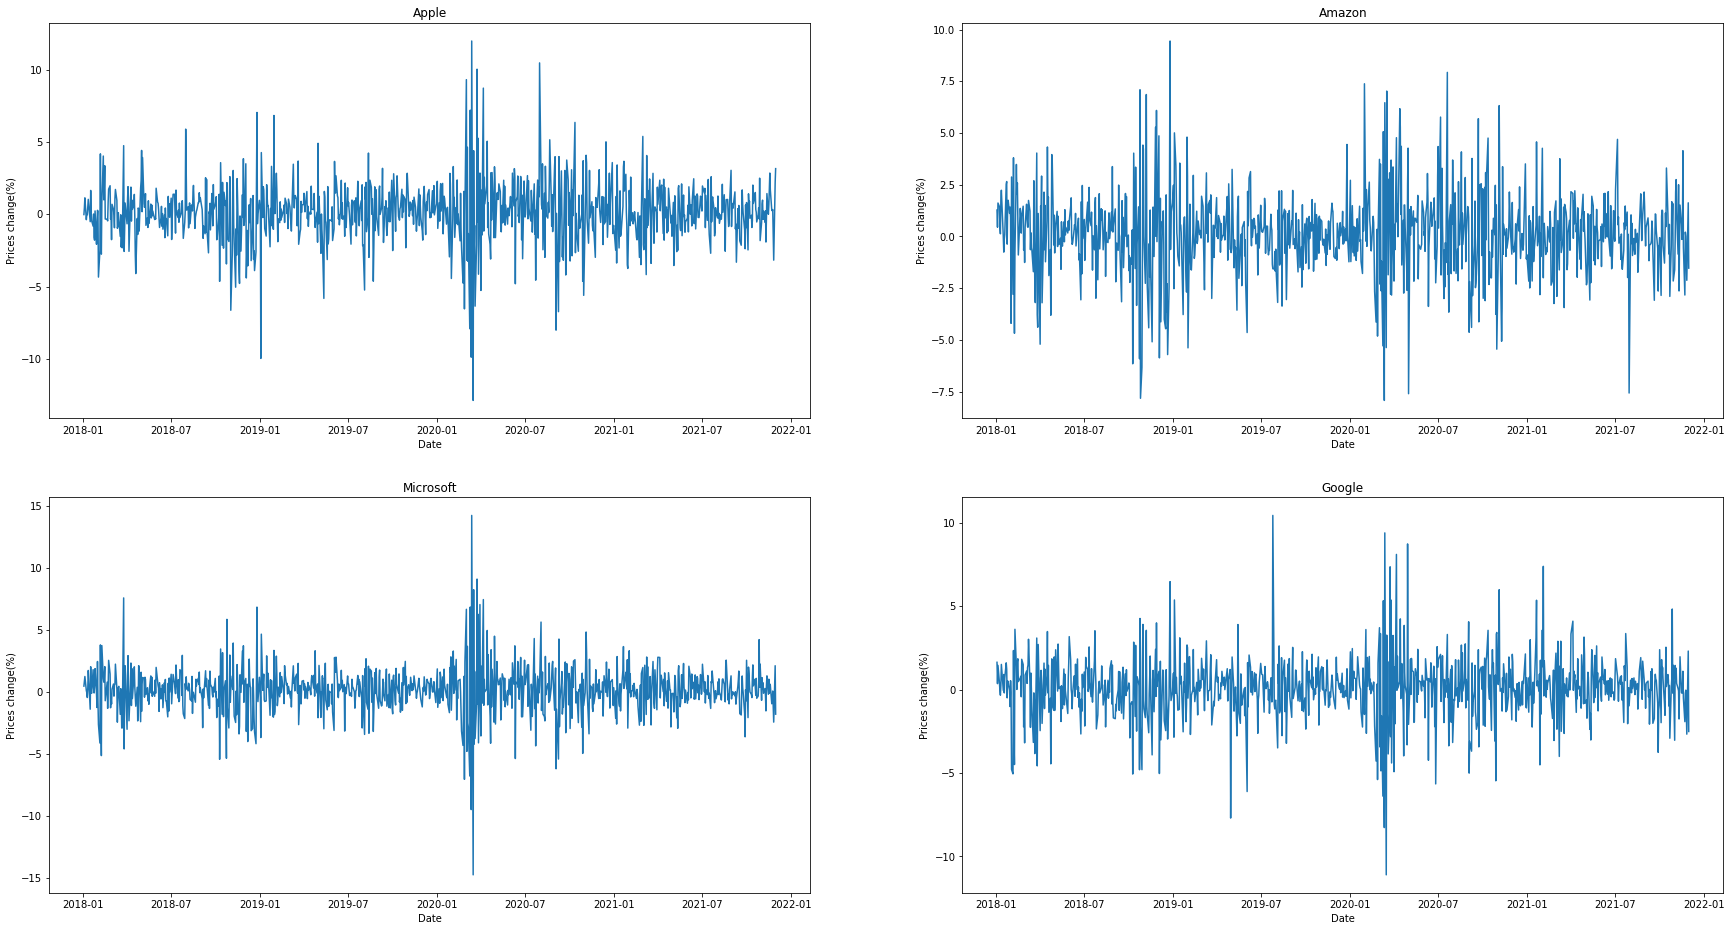

In [75]:
change_prices = [stock_apple_new['change'], stock_amazon_new['change'], stock_microsoft_new['change'], stock_google_new['change']]

fig, ax = plt.subplots(2, 2, figsize=(30, 16))
ax[0, 0].plot(change_prices[0], label='Apple')

ax[0, 1].plot(change_prices[1], label='Amazon')
ax[1, 0].plot(change_prices[2], label='Microsoft')
ax[1, 1].plot(change_prices[3], label='Google')

ax[0, 0].set_xlabel('Date')
ax[0, 0].set_ylabel('Prices change(%)')
ax[0, 0].set_title("Apple")


ax[0, 1].set_xlabel('Date')
ax[0, 1].set_ylabel('Prices change(%)')
ax[0, 1].set_title("Amazon")

ax[1, 0].set_xlabel('Date')
ax[1, 0].set_ylabel('Prices change(%)')
ax[1, 0].set_title("Microsoft")

ax[1, 1].set_xlabel('Date')
ax[1, 1].set_ylabel('Prices change(%)')
ax[1, 1].set_title("Google")

plt.show()

# LSTM sentiment prediction

In [170]:
from google.colab import drive
import pandas as pd 
import string
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [171]:
df_aapl = pd.read_csv("/content/drive/MyDrive/Tweet_data/tweets_APPL_sent.csv")
df_amz = pd.read_csv("/content/drive/MyDrive/Tweet_data/tweets_AMZN_sent.csv")
df_msft = pd.read_csv("/content/drive/MyDrive/Tweet_data/tweets_MSFT_sent.csv")
df_goog = pd.read_csv("/content/drive/MyDrive/Tweet_data/tweets_GOOG_sent.csv")


In [172]:
DATE = pd.to_datetime(df_goog['DATE']).dt.date
df_goog['DATE'] = DATE
df_goog = df_goog.drop('Unnamed: 0',axis=1)
df_goog = df_goog.set_index('DATE')
df_goog.head()

,year,month,day,sentiment,likeCount,retweetCount,replyCount
DATE,,,,,,,
2016-05-19,2016.0,5.0,19.0,0.103911,0.658537,0.896341,0.085366
2016-05-20,2016.0,5.0,20.0,0.142556,0.717791,0.509202,0.110429
2016-05-21,2016.0,5.0,21.0,0.052071,0.818182,0.787879,0.030303
2016-05-22,2016.0,5.0,22.0,0.131364,0.733333,0.844444,0.088889
2016-05-23,2016.0,5.0,23.0,0.102430,0.782609,0.678261,0.069565


In [173]:
DATE = pd.to_datetime(df_msft['DATE']).dt.date
df_msft['DATE'] = DATE
#df_msft = df_msft.drop('Unnamed: 0',axis=1)
df_msft = df_msft.set_index('DATE')
df_msft.head()

,year,month,day,sentiment,likeCount,retweetCount,replyCount
DATE,,,,,,,
2016-01-01,2016.0,1.0,1.0,0.083205,0.690476,0.523810,0.166667
2016-01-02,2016.0,1.0,2.0,0.049279,0.851064,0.829787,0.063830
2016-01-03,2016.0,1.0,3.0,0.097912,0.670732,0.426829,0.048780
2016-01-04,2016.0,1.0,4.0,0.118778,0.627273,0.668182,0.054545
2016-01-05,2016.0,1.0,5.0,0.124824,0.325758,0.318182,0.037879


In [174]:
DATE = pd.to_datetime(df_amz['DATE']).dt.date
df_amz['DATE'] = DATE
df_amz = df_amz.drop('Unnamed: 0',axis=1)
df_amz = df_amz.set_index('DATE')
df_amz.head()


,year,month,day,sentiment,likeCount,retweetCount,replyCount
DATE,,,,,,,
2016-01-01,2016.0,1.0,1.0,0.109124,0.705479,0.253425,0.095890
2016-01-02,2016.0,1.0,2.0,0.200826,0.628205,0.314103,0.089744
2016-01-03,2016.0,1.0,3.0,0.219962,0.771186,0.504237,0.131356
2016-01-04,2016.0,1.0,4.0,0.111751,1.103817,2.254962,0.100763
2016-01-05,2016.0,1.0,5.0,0.144310,0.507937,0.296296,0.070547


In [175]:
DATE = pd.to_datetime(df_aapl['DATE']).dt.date
df_aapl['DATE'] = DATE
df_aapl = df_aapl.drop('Unnamed: 0',axis=1)
df_aapl = df_aapl.set_index('DATE')
df_aapl.head()


,year,month,day,sentiment,likeCount,retweetCount,replyCount
DATE,,,,,,,
2016-01-01,2016.0,1.0,1.0,0.052374,0.913649,0.596100,0.139276
2016-01-02,2016.0,1.0,2.0,0.071209,0.728000,0.477333,0.114667
2016-01-03,2016.0,1.0,3.0,0.064644,0.800000,0.421622,0.089189
2016-01-04,2016.0,1.0,4.0,0.105736,0.902318,0.394040,0.137417
2016-01-05,2016.0,1.0,5.0,0.076951,1.098039,1.349531,0.133845


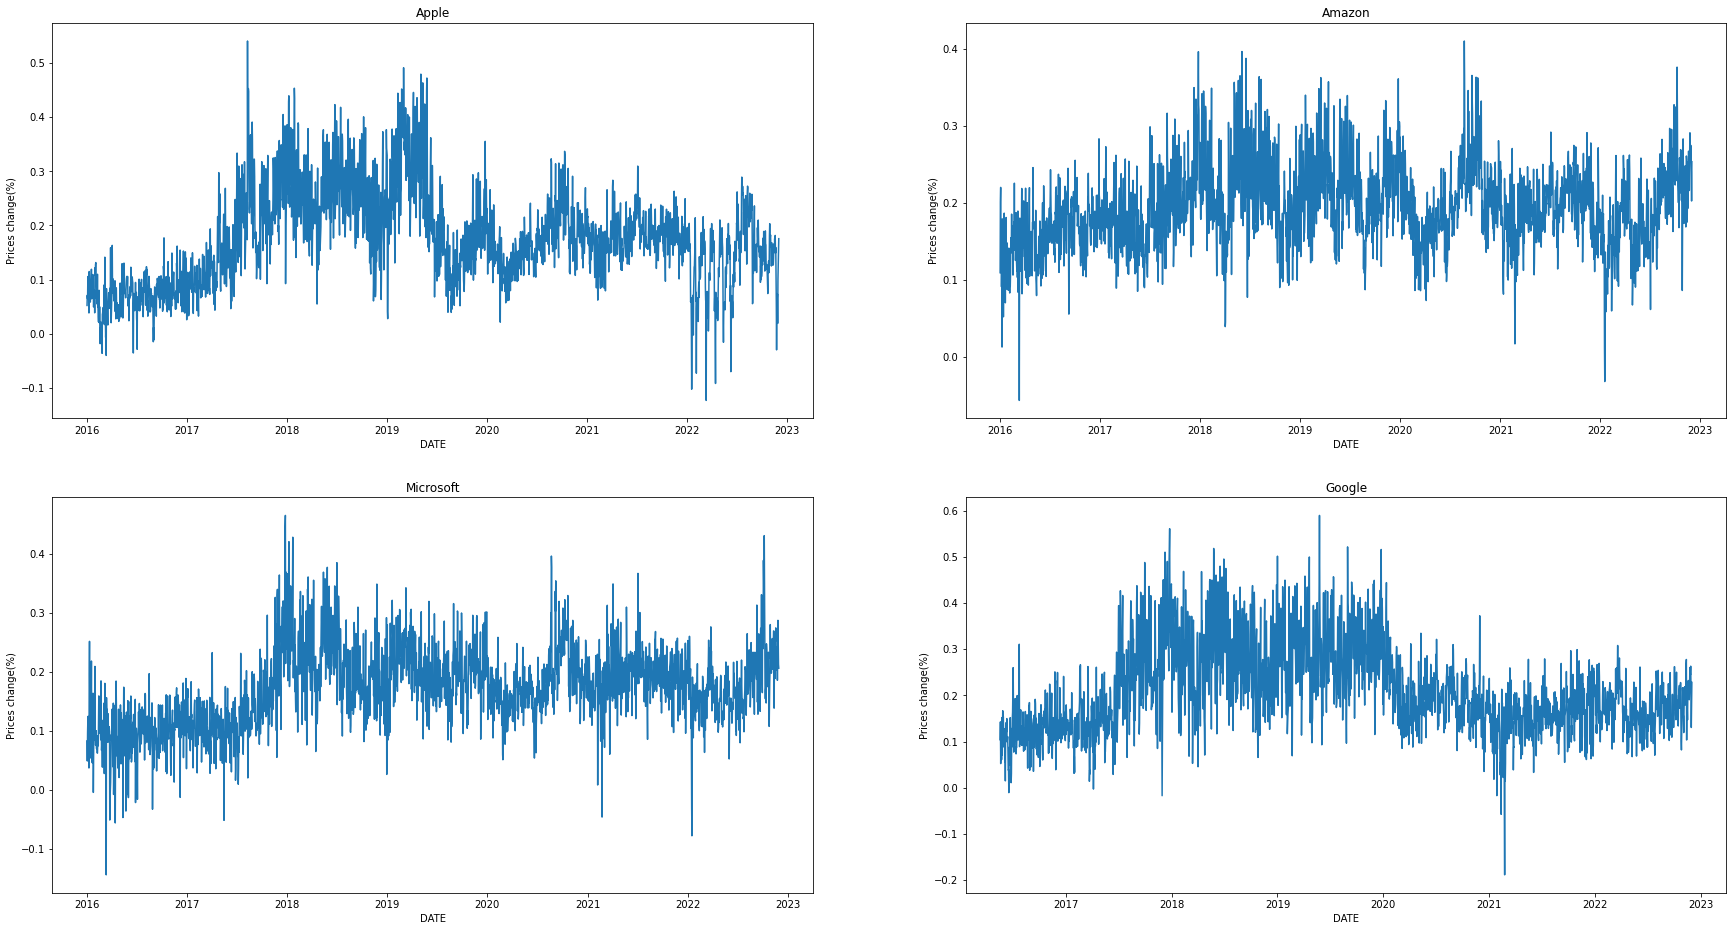

In [82]:
movement = [df_aapl['sentiment'], df_amz['sentiment'], df_msft['sentiment'], df_goog['sentiment']]

fig, ax = plt.subplots(2, 2, figsize=(30, 16))
ax[0, 0].plot(movement[0], label='Apple')
ax[0, 1].plot(movement[1], label='Amazon')
ax[1, 0].plot(movement[2], label='Microsoft')
ax[1, 1].plot(movement[3], label='Google')

ax[0, 0].set_xlabel('DATE')
ax[0, 0].set_ylabel('Prices change(%)')
ax[0, 0].set_title("Apple")


ax[0, 1].set_xlabel('DATE')
ax[0, 1].set_ylabel('Prices change(%)')
ax[0, 1].set_title("Amazon")

ax[1, 0].set_xlabel('DATE')
ax[1, 0].set_ylabel('Prices change(%)')
ax[1, 0].set_title("Microsoft")

ax[1, 1].set_xlabel('DATE')
ax[1, 1].set_ylabel('Prices change(%)')
ax[1, 1].set_title("Google")

plt.show()

In [176]:

sequence_length = 240
values = movement[0].values
training_data_len = int(len(values)* 0.8)

from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))

train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(sequence_length, len(train_data)):
    x_train.append(train_data[i-sequence_length:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [177]:
test_data = scaled_data[training_data_len-sequence_length: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(sequence_length, len(test_data)):
  x_test.append(test_data[i-sequence_length:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [178]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [179]:

model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=3)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 240, 100)          40800     
                                                                 
 lstm_5 (LSTM)               (None, 100)               80400     
                                                                 
 dense_4 (Dense)             (None, 25)                2525      
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
1776/1776 [==============================] - 129s 71ms/step - loss: 0.0096
Epoch 2/3
1776/1776 [==============================] - 118s 67ms/step - loss: 0.0071
Epoch 3/3


In [ ]:
test_data = scaled_data[training_data_len-sequence_length: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(sequence_length, len(test_data)):
  x_test.append(test_data[i-sequence_length:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print(rmse)

Please note: To get plot for different stock, you need to update the code above to corresponding to company name

In [ ]:
#AAPL
data = df_aapl.filter(['sentiment'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Apple Stock Price sentiment')
plt.xlabel('Date')
plt.ylabel('sentiment')
plt.plot(train)
plt.plot(validation[['Predictions', 'sentiment' ]])
plt.legend(['Train Data', 'Predictions', 'sentiment' ], loc='upper left')
plt.show()

In [ ]:
# MSFT
data = df_msft.filter(['sentiment'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('MSFT Stock Price sentiment')
plt.xlabel('Date')
plt.ylabel('sentiment')
plt.plot(train)
plt.plot(validation[['Predictions', 'sentiment' ]])
plt.legend(['Train Data', 'Predictions', 'sentiment' ], loc='upper left')
plt.show()

<ipython-input-90-66f195829802>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


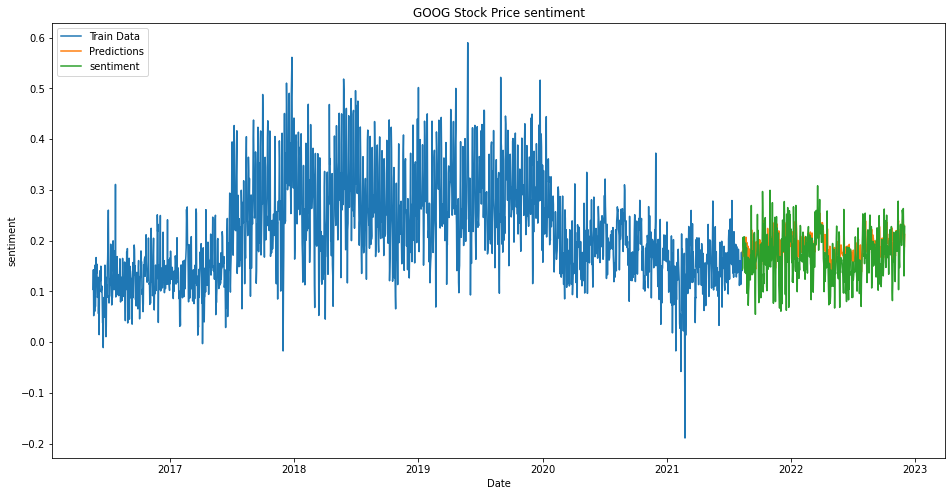

In [90]:
# GOOGLE
data = df_goog.filter(['sentiment'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('GOOG Stock Price sentiment')
plt.xlabel('Date')
plt.ylabel('sentiment')
plt.plot(train)
plt.plot(validation[['Predictions', 'sentiment' ]])
plt.legend(['Train Data', 'Predictions', 'sentiment' ], loc='upper left')
plt.show()

In [ ]:
#AMZN
data = df_amz.filter(['sentiment'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('AMZ Stock Price sentiment')
plt.xlabel('Date')
plt.ylabel('sentiment')
plt.plot(train)
plt.plot(validation[['Predictions', 'sentiment' ]])
plt.legend(['Train Data', 'Predictions', 'sentiment' ], loc='upper left')
plt.show()

# Random Forest 

In [99]:
import yfinance as yf
import datetime as dt
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

In [100]:
from google.colab import drive
import pandas as pd 
import string
drive.mount("/content/drive")
import numpy as np
import pandas as pd
apple = pd.read_csv('/content/drive/MyDrive/Tweet_data/tweets_APPL_sent.csv', index_col='DATE', parse_dates=True)
apple['scores'] = apple['sentiment'] * (apple['likeCount'] + apple['retweetCount'])
apple.head()

stock_apple = yf.download('AAPL', start='2016-01-01', end='2022-12-01')
stock_apple['tweet_score'] = apple['scores']
stock_apple.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,tweet_score
Date,,,,,,,
2016-01-04,25.652500,26.342501,25.500000,26.337500,24.111500,270597600,0.137072
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.507284,223164000,0.188344
2016-01-06,25.139999,25.592501,24.967501,25.174999,23.047249,273829600,0.083127
2016-01-07,24.670000,25.032499,24.107500,24.112499,22.074551,324377600,0.099019
2016-01-08,24.637501,24.777500,24.190001,24.240000,22.191278,283192000,0.069666


## historical price only

### AAPL

In [101]:
stock_apple = stock_apple.dropna()
x = stock_apple.iloc[:, 4:6].values
y = stock_apple.iloc[:, 4].values

training_data_len = int(0.8*len(x))
x_train = x[:training_data_len,:]
x_test = x[training_data_len:,:]
y_train = y[:training_data_len]
y_test = y[training_data_len:]

scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [106]:
grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}

model = RandomForestRegressor()
rscv = RandomizedSearchCV(estimator=model, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200,scoring="accuracy")



In [107]:
rscv_fit = rscv.fit(x_train, y_train)
best_parameters = rscv_fit.best_params_
print(best_parameters)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
{'random_state': 42, 'n_estimators': 100, 'min_samples_split': 9, 'min_samples_leaf': 9, 'max_depth': 14, 'bootstrap': False}


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
  warnings.warn(


<ipython-input-108-7f2cf13a1d1d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predict


12.907220609020381


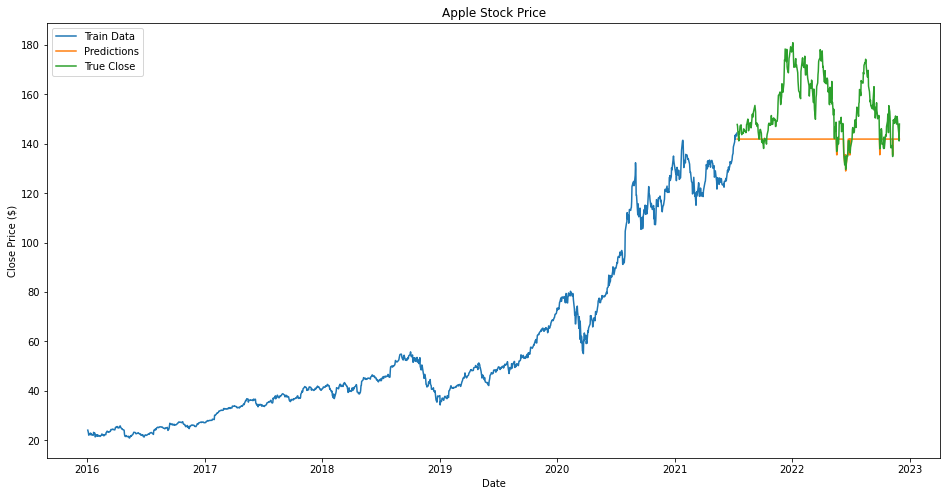

In [108]:
model = RandomForestRegressor(n_estimators=100, random_state=42, min_samples_split=9, min_samples_leaf=9, max_depth=14, bootstrap=False)
model.fit(x_train, y_train)
predict = model.predict(x_test)

data = stock_apple.filter(['Adj Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predict
rmse = np.sqrt(np.mean(predict - y_test)**2)
print(rmse)

plt.figure(figsize=(16,8))
plt.title('Apple Stock Price')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.plot(train)
plt.plot(validation[['Predictions', 'Adj Close' ]])
plt.legend(['Train Data', 'Predictions', 'True Close' ], loc='upper left')
plt.show()

### MSFT

In [109]:
stock_microsoft = stock_microsoft.dropna()
x = stock_microsoft.iloc[:, 4:6].values
y = stock_microsoft.iloc[:, 4].values

training_data_len = int(0.8*len(x))
x_train = x[:training_data_len,:]
x_test = x[training_data_len:,:]
y_train = y[:training_data_len]
y_test = y[training_data_len:]

scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [110]:
grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}

rscv = RandomizedSearchCV(estimator=model, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200,scoring="accuracy")
rscv_fit = rscv.fit(x_train, y_train)
best_parameters = rscv_fit.best_params_
print(best_parameters)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
{'random_state': 2, 'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 9, 'max_depth': 1, 'bootstrap': False}


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
  warnings.warn(


<ipython-input-111-a9054c58e4e5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predict


36.51696635341463


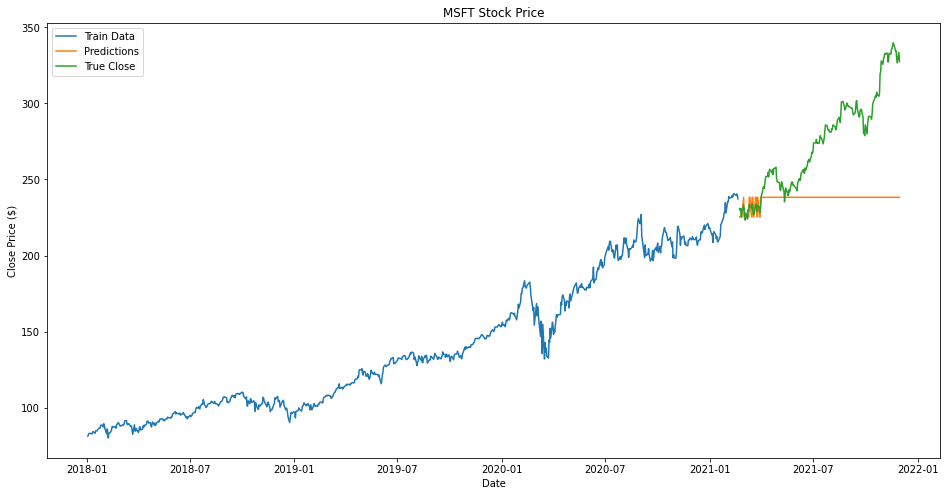

In [111]:
model = RandomForestRegressor(n_estimators=50, random_state=2, min_samples_split=2, min_samples_leaf=9, max_depth=1, bootstrap=False)
model.fit(x_train, y_train)
predict = model.predict(x_test)

data = stock_microsoft.filter(['Adj Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predict
rmse = np.sqrt(np.mean(predict - y_test)**2)
print(rmse)

plt.figure(figsize=(16,8))
plt.title('MSFT Stock Price')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.plot(train)
plt.plot(validation[['Predictions', 'Adj Close' ]])
plt.legend(['Train Data', 'Predictions', 'True Close' ], loc='upper left')
plt.show()

### goog

In [112]:
stock_google = stock_google.dropna()
x = stock_google.iloc[:, 4:6].values
y = stock_google.iloc[:, 4].values

training_data_len = int(0.8*len(x))
x_train = x[:training_data_len,:]
x_test = x[training_data_len:,:]
y_train = y[:training_data_len]
y_test = y[training_data_len:]

scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [113]:
grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}

rscv = RandomizedSearchCV(estimator=model, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200,scoring="accuracy")
rscv_fit = rscv.fit(x_train, y_train)
best_parameters = rscv_fit.best_params_
print(best_parameters)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
  warnings.warn(


{'random_state': 30, 'n_estimators': 500, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_depth': 13, 'bootstrap': True}


23.488258376346852


<ipython-input-114-3f70baba2da8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predict


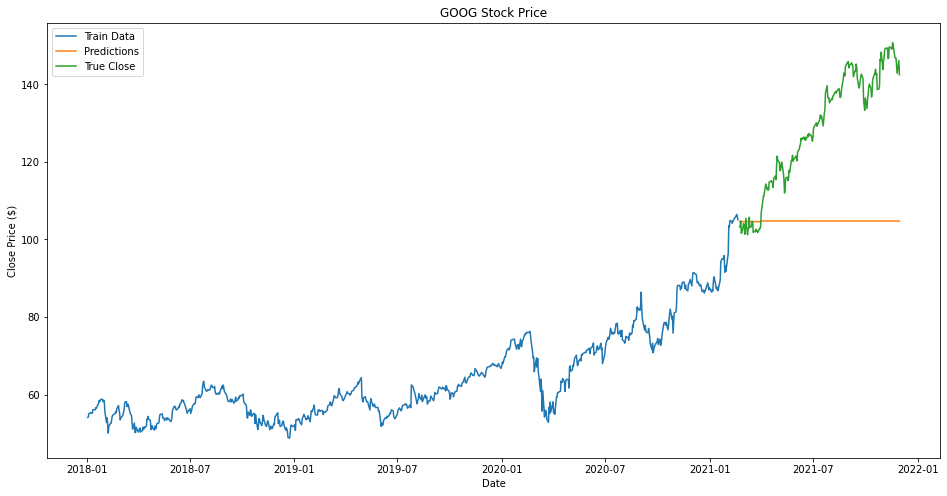

In [114]:
model = RandomForestRegressor(n_estimators=500, random_state=30, min_samples_split=9, min_samples_leaf=3, max_depth=13, bootstrap=True)
model.fit(x_train, y_train)
predict = model.predict(x_test)

data = stock_google.filter(['Adj Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predict
rmse = np.sqrt(np.mean(predict - y_test)**2)
print(rmse)

plt.figure(figsize=(16,8))
plt.title('GOOG Stock Price')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.plot(train)
plt.plot(validation[['Predictions', 'Adj Close' ]])
plt.legend(['Train Data', 'Predictions', 'True Close' ], loc='upper left')
plt.show()

### AMZ

In [115]:
stock_google = stock_google.dropna()
x = stock_google.iloc[:, 4:6].values
y = stock_google.iloc[:, 4].values

training_data_len = int(0.8*len(x))
x_train = x[:training_data_len,:]
x_test = x[training_data_len:,:]
y_train = y[:training_data_len]
y_test = y[training_data_len:]

scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [116]:
grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}

rscv = RandomizedSearchCV(estimator=model, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200,scoring="accuracy")
rscv_fit = rscv.fit(x_train, y_train)
best_parameters = rscv_fit.best_params_
print(best_parameters)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
  warnings.warn(


{'random_state': 42, 'n_estimators': 500, 'min_samples_split': 9, 'min_samples_leaf': 13, 'max_depth': 13, 'bootstrap': True}


2.698727759971066


<ipython-input-134-dd5c081da4e8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predict


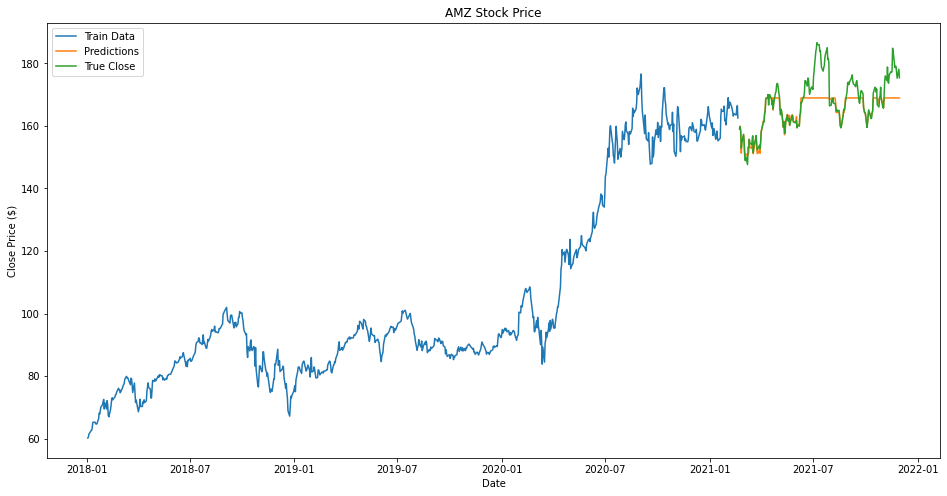

In [134]:
model = RandomForestRegressor(n_estimators=500, random_state=42, min_samples_split=9, min_samples_leaf=13, max_depth=13, bootstrap=True)
model.fit(x_train, y_train)
predict = model.predict(x_test)

data = stock_amazon.filter(['Adj Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predict
rmse = np.sqrt(np.mean(predict - y_test)**2)
print(rmse)

plt.figure(figsize=(16,8))
plt.title('AMZ Stock Price')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.plot(train)
plt.plot(validation[['Predictions', 'Adj Close' ]])
plt.legend(['Train Data', 'Predictions', 'True Close' ], loc='upper left')
plt.show()

## historical price and sentiment


### AAPL

In [118]:
stock_apple = stock_apple.dropna()
x = stock_apple.iloc[:, 4:].values
y = stock_apple.iloc[:, 4].values

training_data_len = int(0.8*len(x))
x_train = x[:training_data_len,:]
x_test = x[training_data_len:,:]
y_train = y[:training_data_len]
y_test = y[training_data_len:]

scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [119]:
grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}

rscv = RandomizedSearchCV(estimator=model, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)


In [120]:
rscv_fit = rscv.fit(x_train, y_train)
best_parameters = rscv_fit.best_params_
print(best_parameters)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
{'random_state': 2, 'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 13, 'bootstrap': False}


<ipython-input-121-7b06b47faba9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predict


11.488185012203523


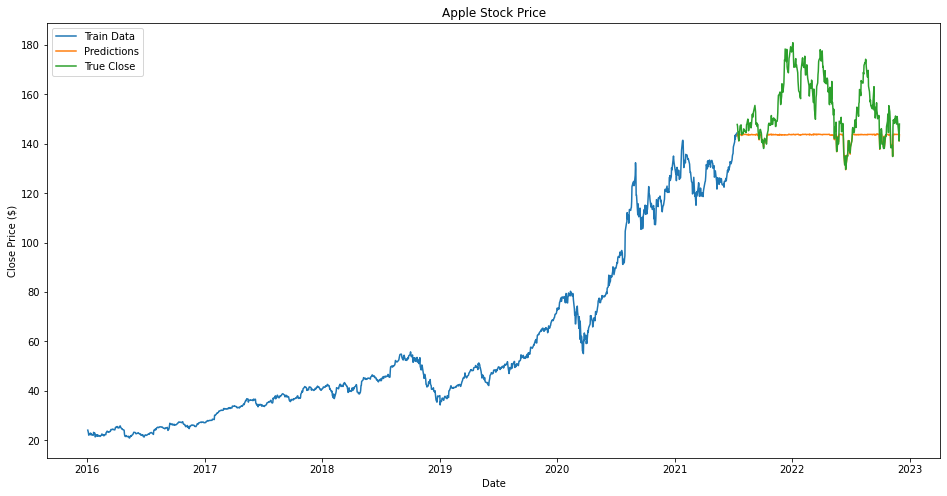

In [121]:
model = RandomForestRegressor(n_estimators=100, random_state=2, min_samples_split=2, min_samples_leaf=1, max_depth=13, bootstrap=False)
model.fit(x_train, y_train)
predict = model.predict(x_test)

data = stock_apple.filter(['Adj Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predict
rmse = np.sqrt(np.mean(predict - y_test)**2)
print(rmse)

plt.figure(figsize=(16,8))
plt.title('Apple Stock Price')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.plot(train)
plt.plot(validation[['Predictions', 'Adj Close' ]])
plt.legend(['Train Data', 'Predictions', 'True Close' ], loc='upper left')
plt.show()

### MSFT

In [122]:
stock_microsoft = stock_microsoft.dropna()
x = stock_microsoft.iloc[:, 4:].values
y = stock_microsoft.iloc[:, 4].values
training_data_len = int(0.8*len(x))
x_train = x[:training_data_len,:]
x_test = x[training_data_len:,:]
y_train = y[:training_data_len]
y_test = y[training_data_len:]
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [123]:
grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}

rscv = RandomizedSearchCV(estimator=model, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)


In [124]:
rscv_fit = rscv.fit(x_train, y_train)
best_parameters = rscv_fit.best_params_
print(best_parameters)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
{'random_state': 30, 'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 8, 'bootstrap': False}


34.83793369428761


<ipython-input-125-df87276c34ad>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predict


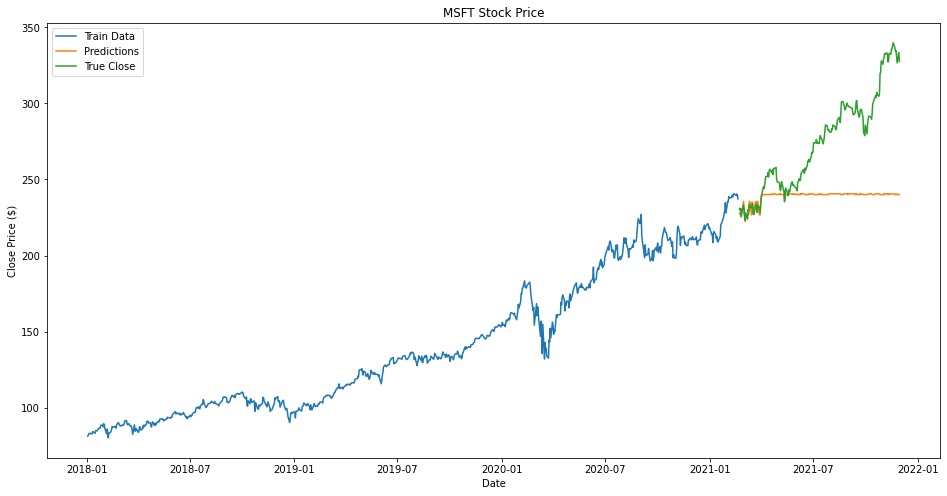

In [125]:
model = RandomForestRegressor(n_estimators=500, random_state=30, min_samples_split=2, min_samples_leaf=1, max_depth=8, bootstrap=False)
model.fit(x_train, y_train)
predict = model.predict(x_test)

data = stock_microsoft.filter(['Adj Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predict
rmse = np.sqrt(np.mean(predict - y_test)**2)
print(rmse)

plt.figure(figsize=(16,8))
plt.title('MSFT Stock Price')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.plot(train)
plt.plot(validation[['Predictions', 'Adj Close' ]])
plt.legend(['Train Data', 'Predictions', 'True Close' ], loc='upper left')
plt.show()

### GOOG

In [139]:
stock_google = stock_google.dropna()
x = stock_google.iloc[:, 4:].values
y = stock_google.iloc[:, 4].values
training_data_len = int(0.8*len(x))

x_train = x[:training_data_len,:]
x_test = x[training_data_len:,:]
y_train = y[:training_data_len]
y_test = y[training_data_len:]
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [140]:
grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}

rscv = RandomizedSearchCV(estimator=model, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)


In [141]:
rscv_fit = rscv.fit(x_train, y_train)
best_parameters = rscv_fit.best_params_
print(best_parameters)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
{'random_state': 2, 'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_depth': 13, 'bootstrap': False}


22.42842945027874


<ipython-input-142-fffd8b3ad138>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predict


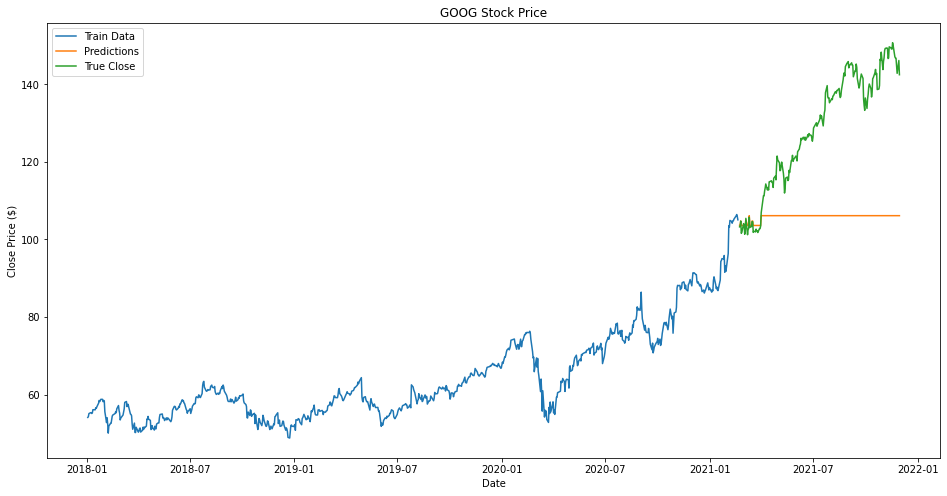

In [142]:
model = RandomForestRegressor(n_estimators=50, random_state=42, min_samples_split=2, min_samples_leaf=3, max_depth=12, bootstrap=False)
model.fit(x_train, y_train)
predict = model.predict(x_test)

data = stock_google.filter(['Adj Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predict
rmse = np.sqrt(np.mean(predict - y_test)**2)
print(rmse)

plt.figure(figsize=(16,8))
plt.title('GOOG Stock Price')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.plot(train)
plt.plot(validation[['Predictions', 'Adj Close' ]])
plt.legend(['Train Data', 'Predictions', 'True Close' ], loc='upper left')
plt.show()

### AMZ

In [130]:
stock_amazon = stock_amazon.dropna()
x = stock_amazon.iloc[:, 4:].values
y = stock_amazon.iloc[:, 4].values
training_data_len = int(0.8*len(x))
x_train = x[:training_data_len,:]
x_test = x[training_data_len:,:]
y_train = y[:training_data_len]
y_test = y[training_data_len:]
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [131]:
grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}

rscv = RandomizedSearchCV(estimator=model, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)


In [132]:
rscv_fit = rscv.fit(x_train, y_train)
best_parameters = rscv_fit.best_params_
print(best_parameters)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
{'random_state': 30, 'n_estimators': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 13, 'bootstrap': True}


0.6073202181588571


<ipython-input-133-09fa98bc8090>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predict


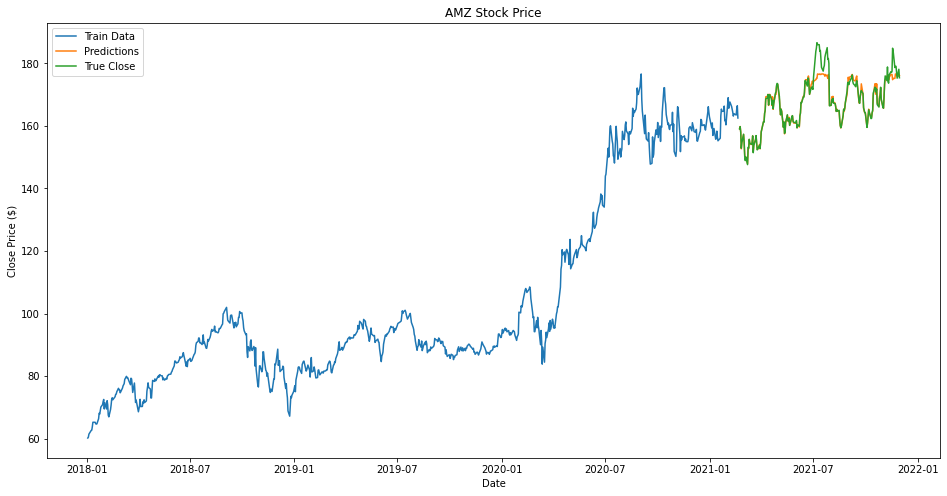

In [133]:
model = RandomForestRegressor(n_estimators=20, random_state=2, min_samples_split=2, min_samples_leaf=1, max_depth=11, bootstrap=False)
model.fit(x_train, y_train)
predict = model.predict(x_test)

data = stock_amazon.filter(['Adj Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predict
rmse = np.sqrt(np.mean(predict - y_test)**2)
print(rmse)

plt.figure(figsize=(16,8))
plt.title('AMZ Stock Price')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.plot(train)
plt.plot(validation[['Predictions', 'Adj Close' ]])
plt.legend(['Train Data', 'Predictions', 'True Close' ], loc='upper left')
plt.show()

## sentiment prediction

### AAPL

In [143]:
movement = [df_aapl['sentiment'], df_amz['sentiment'], df_msft['sentiment'], df_goog['sentiment']]


In [144]:
df_aapl

,year,month,day,sentiment,likeCount,retweetCount,replyCount
DATE,,,,,,,
2016-01-01,2016.0,1.0,1.0,0.052374,0.913649,0.596100,0.139276
2016-01-02,2016.0,1.0,2.0,0.071209,0.728000,0.477333,0.114667
2016-01-03,2016.0,1.0,3.0,0.064644,0.800000,0.421622,0.089189
2016-01-04,2016.0,1.0,4.0,0.105736,0.902318,0.394040,0.137417
2016-01-05,2016.0,1.0,5.0,0.076951,1.098039,1.349531,0.133845
...,...,...,...,...,...,...,...
2022-11-27,2022.0,11.0,27.0,0.019246,4.349932,0.775580,0.602319
2022-11-28,2022.0,11.0,28.0,0.100462,9.947166,1.453048,1.158289
2022-11-29,2022.0,11.0,29.0,0.126369,6.524866,0.849098,0.800341


In [152]:
df_aapl = df_aapl.dropna()
x = df_aapl.iloc[:, 3:].values
y = df_aapl.iloc[:, 3].values
training_data_len = int(0.8*len(x))

x_train = x[:training_data_len,:]
x_test = x[training_data_len:,:]
y_train = y[:training_data_len]
y_test = y[training_data_len:]
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [153]:
grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}

rscv = RandomizedSearchCV(estimator=model, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)


In [154]:
rscv_fit = rscv.fit(x_train, y_train)
best_parameters = rscv_fit.best_params_
print(best_parameters)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
{'random_state': 42, 'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': True}


<ipython-input-155-f304fc30aa94>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predict


0.0004934881857286626


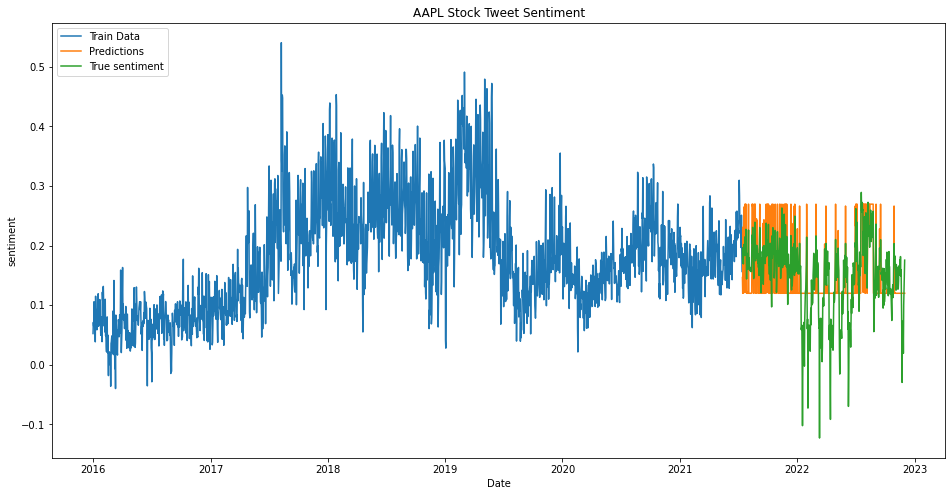

In [155]:
model = RandomForestRegressor(n_estimators=100, random_state=42, min_samples_split=2, min_samples_leaf=10, max_depth=1, bootstrap=True)
model.fit(x_train, y_train)
predict = model.predict(x_test)

data = df_aapl.filter(['sentiment'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predict
rmse = np.sqrt(np.mean(predict - y_test)**2)
print(rmse)

plt.figure(figsize=(16,8))
plt.title('AAPL Stock Tweet Sentiment')
plt.xlabel('Date')
plt.ylabel('sentiment')
plt.plot(train)
plt.plot(validation[['Predictions', 'sentiment' ]])
plt.legend(['Train Data', 'Predictions', 'True sentiment' ], loc='upper left')
plt.show()

### MSFT

In [157]:
df_msft = df_msft.dropna()
x = df_msft.iloc[:, 3:].values
y = df_msft.iloc[:, 3].values
training_data_len = int(0.8*len(x))

x_train = x[:training_data_len,:]
x_test = x[training_data_len:,:]
y_train = y[:training_data_len]
y_test = y[training_data_len:]
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [158]:
grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}

rscv = RandomizedSearchCV(estimator=model, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)

In [159]:
rscv_fit = rscv.fit(x_train, y_train)
best_parameters = rscv_fit.best_params_
print(best_parameters)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
{'random_state': 42, 'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 9, 'bootstrap': True}


<ipython-input-160-a2c946ad0cf4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predict


4.675786155791041e-05


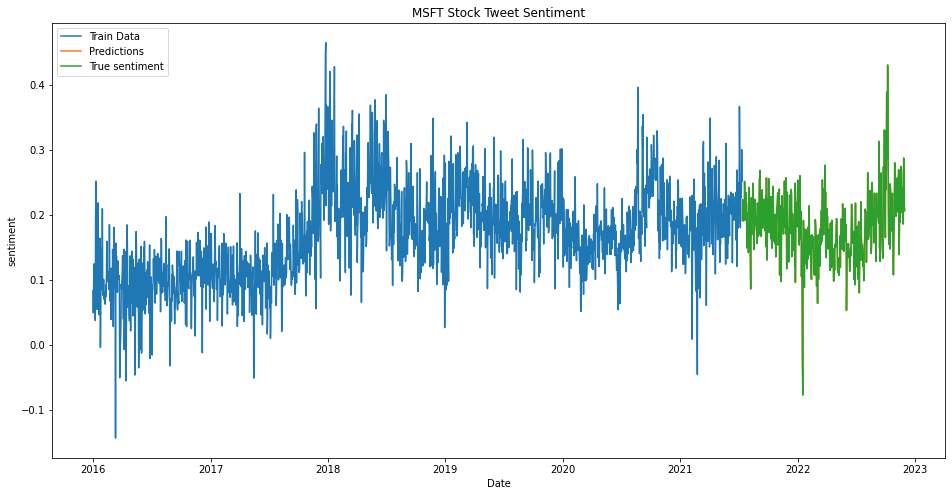

In [160]:
model = RandomForestRegressor(n_estimators=100, random_state=42, min_samples_split=2, min_samples_leaf=1, max_depth=9, bootstrap=True)
model.fit(x_train, y_train)
predict = model.predict(x_test)

data = df_msft.filter(['sentiment'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predict
rmse = np.sqrt(np.mean(predict - y_test)**2)
print(rmse)

plt.figure(figsize=(16,8))
plt.title('MSFT Stock Tweet Sentiment')
plt.xlabel('Date')
plt.ylabel('sentiment')
plt.plot(train)
plt.plot(validation[['Predictions', 'sentiment' ]])
plt.legend(['Train Data', 'Predictions', 'True sentiment' ], loc='upper left')
plt.show()

### GOOG

In [161]:
df_goog = df_goog.dropna()
x = df_goog.iloc[:, 3:].values
y = df_goog.iloc[:, 3].values
training_data_len = int(0.8*len(x))

x_train = x[:training_data_len,:]
x_test = x[training_data_len:,:]
y_train = y[:training_data_len]
y_test = y[training_data_len:]
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [162]:
grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}

rscv = RandomizedSearchCV(estimator=model, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)

In [163]:
rscv_fit = rscv.fit(x_train, y_train)
best_parameters = rscv_fit.best_params_
print(best_parameters)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
{'random_state': 1, 'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 9, 'bootstrap': True}


9.586383773606008e-06


<ipython-input-164-3f2fed8d124f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predict


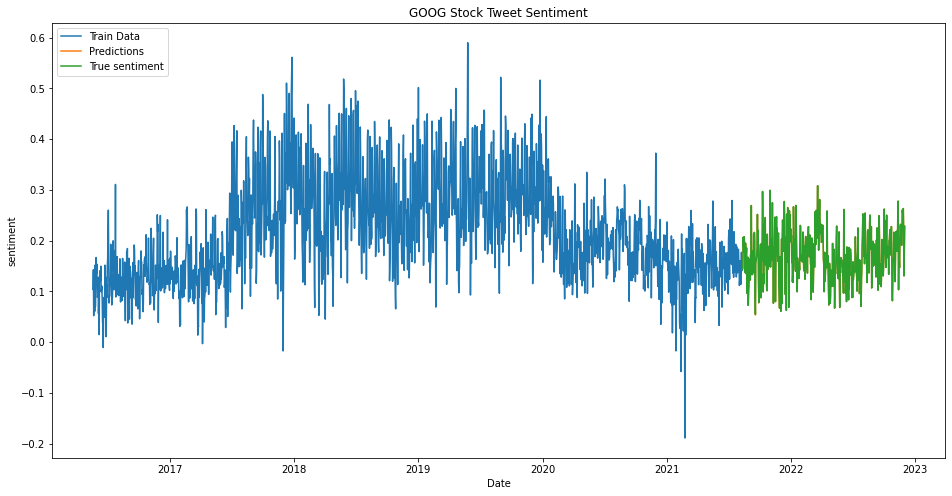

In [164]:
model = RandomForestRegressor(n_estimators=1000, random_state=1, min_samples_split=2, min_samples_leaf=1, max_depth=9, bootstrap=True)
model.fit(x_train, y_train)
predict = model.predict(x_test)

data = df_goog.filter(['sentiment'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predict
rmse = np.sqrt(np.mean(predict - y_test)**2)
print(rmse)

plt.figure(figsize=(16,8))
plt.title('GOOG Stock Tweet Sentiment')
plt.xlabel('Date')
plt.ylabel('sentiment')
plt.plot(train)
plt.plot(validation[['Predictions', 'sentiment' ]])
plt.legend(['Train Data', 'Predictions', 'True sentiment' ], loc='upper left')
plt.show()

### AMZ

In [166]:
df_amz = df_amz.dropna()
x = df_amz.iloc[:, 3:].values
y = df_amz.iloc[:, 3].values
training_data_len = int(0.8*len(x))

x_train = x[:training_data_len,:]
x_test = x[training_data_len:,:]
y_train = y[:training_data_len]
y_test = y[training_data_len:]
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [167]:
grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}

rscv = RandomizedSearchCV(estimator=model, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)

In [168]:
rscv_fit = rscv.fit(x_train, y_train)
best_parameters = rscv_fit.best_params_
print(best_parameters)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
{'random_state': 30, 'n_estimators': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 12, 'bootstrap': False}


4.718595549323102e-05


<ipython-input-169-7b6cef5f020a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predict


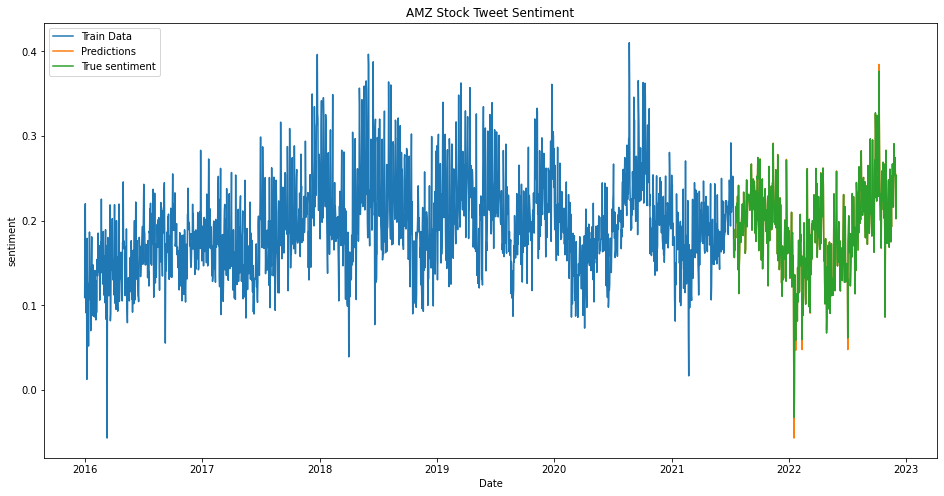

In [169]:
model = RandomForestRegressor(n_estimators=20, random_state=30, min_samples_split=2, min_samples_leaf=1, max_depth=12, bootstrap=False)
model.fit(x_train, y_train)
predict = model.predict(x_test)

data = df_amz.filter(['sentiment'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predict
rmse = np.sqrt(np.mean(predict - y_test)**2)
print(rmse)

plt.figure(figsize=(16,8))
plt.title('AMZ Stock Tweet Sentiment')
plt.xlabel('Date')
plt.ylabel('sentiment')
plt.plot(train)
plt.plot(validation[['Predictions', 'sentiment' ]])
plt.legend(['Train Data', 'Predictions', 'True sentiment' ], loc='upper left')
plt.show()